**Task 1**

In [2]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [3]:
if torch.cuda.is_available():
    compute_unit = torch.device("cuda")
    print("NVIDIA CUDA GPU in use.")
else:
    compute_unit = torch.device("cpu")
    print("Fallback to CPU execution.")

Fallback to CPU execution.


- Load DataSet

In [ ]:
file_path = "customer_churn_data.csv"

try:

    churn_df = pd.read_csv(file_path, encoding="latin1") 
    print("Dataset loaded successfully:", file_path)
except FileNotFoundError:
    print("Error: The file was not found.")
    exit()
except UnicodeDecodeError:
    print("Encoding error: Try changing encoding to 'ISO-8859-1' or 'cp1252'.")
    exit()

print("\nDataFrame Info:")
print("Dataset Shape:", churn_df.shape)
churn_df.info()

# Handle missing values and display summary statistics
print("\n--- Missing Values Before Handling ---")
print(churn_df.isnull().sum())

if "total_charges" in churn_df.columns:  
    churn_df["total_charges"] = pd.to_numeric(churn_df["total_charges"], errors="coerce")

    median_total_charges = churn_df["total_charges"].median()
    churn_df["total_charges"].fillna(median_total_charges, inplace=True)

print("\n--- Missing Values After Handling ---")
print(churn_df.isnull().sum())

print("\n--- Summary Statistics ---")
print(churn_df.describe())

Dataset loaded successfully: customer_churn_data.csv

DataFrame Info:
Dataset Shape: (10000, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            10000 non-null  object 
 1   age                    10000 non-null  int64  
 2   gender                 10000 non-null  object 
 3   senior_citizen         10000 non-null  int64  
 4   partner                10000 non-null  object 
 5   dependents             10000 non-null  object 
 6   tenure                 10000 non-null  int64  
 7   phone_service          10000 non-null  object 
 8   multiple_lines         10000 non-null  object 
 9   internet_service       10000 non-null  object 
 10  online_security        10000 non-null  object 
 11  online_backup          10000 non-null  object 
 12  device_protection      10000 non-null  object 
 13  tech_suppo

/tmp/ipython-input-3408955811.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  churn_df["total_charges"].fillna(median_total_charges, inplace=True)


**Task 2**

In [ ]:
import pandas as pd

print(" Task 2: Exploratory Data Analysis")

# Load dataset
try:
    df = pd.read_csv("customer_churn_data.csv", encoding="latin1") 
    print(" Dataset loaded successfully.")
except FileNotFoundError:
    print("File not found. Please check the path.")
    df = pd.DataFrame()  
except UnicodeDecodeError:
    print("Encoding error: Try changing encoding to 'ISO-8859-1' or 'cp1252'.")
    df = pd.DataFrame() 

# Proceed only if dataset is not empty
if not df.empty:
    # Checking missing values
    print("\n Missing Values in Each Column:")
    print(df.isnull().sum())

    # Handle missing Age column values if exists
    if "Age" in df.columns and df["Age"].isnull().any():
        median_age = df["Age"].median()
        df["Age"].fillna(median_age, inplace=True)
        print("\n Missing 'Age' values filled with median:", median_age)

    # Handle other missing columns 
    numeric_cols = df.select_dtypes(include=['int64','float64']).columns
    for col in numeric_cols:
        if df[col].isnull().any():
            df[col].fillna(df[col].median(), inplace=True)
            print(f"Missing values in '{col}' filled with median.")

    # Summary statistics
    print("\n Summary Statistics:")
    print(df.describe(include="all"))

    # Detecting outliers
    if "Age" in df.columns:
        Q1 = df["Age"].quantile(0.25)
        Q3 = df["Age"].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df[(df["Age"] < (Q1 - 1.5 * IQR)) | (df["Age"] > (Q3 + 1.5 * IQR))]
        print(f"\n Found {len(outliers)} potential outliers in 'Age' column.")

    if "Price" in df.columns:
        Q1 = df["Price"].quantile(0.25)
        Q3 = df["Price"].quantile(0.75)
        IQR = Q3 - Q1
        outliers_price = df[(df["Price"] < (Q1 - 1.5 * IQR)) | (df["Price"] > (Q3 + 1.5 * IQR))]
        print(f" Found {len(outliers_price)} potential outliers in 'Price' column.")


    if "churn" in df.columns:
        print("\n 'churn' column summary:")
        print(df["churn"].value_counts())
    else:
        print("\n Column 'churn' not found in dataset. Skipping churn analysis.")

else:
    print("Dataset is empty. Cannot perform EDA.")

🔍 Task 2: Exploratory Data Analysis
 Dataset loaded successfully.

 Missing Values in Each Column:
customer_id              0
age                      0
gender                   0
senior_citizen           0
partner                  0
dependents               0
tenure                   0
phone_service            0
multiple_lines           0
internet_service         0
online_security          0
online_backup            0
device_protection        0
tech_support             0
streaming_tv             0
streaming_movies         0
contract                 0
paperless_billing        0
payment_method           0
monthly_charges          0
total_charges            0
customer_satisfaction    0
support_calls            0
churn                    0
dtype: int64

 Summary Statistics:
        customer_id           age gender  senior_citizen partner dependents  \
count         10000  10000.000000  10000    10000.000000   10000      10000   
unique        10000           NaN      2             NaN    

Task 3

In [18]:
print("Task 3: Data Preprocessing")

# Encode categorical variables and scale numerical features
binary_cols = ['gender', 'partner', 'dependents', 'phone_service', 'paperless_billing', 'churn']
for col in binary_cols:
    df[col] = df[col].apply(lambda x: 1 if x == 'Yes' or x == 'Male' else 0)

categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("\n--- Data Head After Encoding ---")
print(df.head())
print("\n--- Data Shape After Encoding ---")
print(df.shape)


# Perform feature engineering if beneficial
numerical_features = ['tenure', 'monthly_charges', 'total_charges']

data_tensor = torch.tensor(df[numerical_features].values, dtype=torch.float32)

min_vals = data_tensor.min(dim=0, keepdim=True).values
max_vals = data_tensor.max(dim=0, keepdim=True).values
scaled_tensor = (data_tensor - min_vals) / (max_vals - min_vals)

df[numerical_features] = scaled_tensor.numpy()

print("\n--- Data Head After Scaling ---")
print(df.head())


# Split data
X = df.drop('churn', axis=1)
y = df['churn']

X_tensor = torch.tensor(X.astype(np.float32).values)
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

torch.manual_seed(42)
indices = torch.randperm(len(X_tensor))

train_size = int(0.7 * len(X_tensor))
val_size = int(0.15 * len(X_tensor))
test_size = len(X_tensor) - train_size - val_size

train_indices = indices[:train_size]
val_indices = indices[train_size:train_size + val_size]
test_indices = indices[train_size + val_size:]

X_train, y_train = X_tensor[train_indices], y_tensor[train_indices]
X_val, y_val = X_tensor[val_indices], y_tensor[val_indices]
X_test, y_test = X_tensor[test_indices], y_tensor[test_indices]

print(f"\nTrain set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")


Task 3: Data Preprocessing

--- Data Head After Encoding ---
   age  gender  senior_citizen  partner  dependents  tenure  phone_service  \
0   52       1               0        1           1       7              1   
1   42       1               0        1           0      32              1   
2   54       1               0        0           1      12              1   
3   67       1               1        0           0       3              1   
4   41       0               0        1           0       7              1   

   paperless_billing  monthly_charges  total_charges  ...  tech_support_Yes  \
0                  1            39.18         294.66  ...              True   
1                  1            40.36        1286.75  ...             False   
2                  0            84.77         947.09  ...             False   
3                  0            54.14         172.76  ...             False   
4                  1            71.77         466.98  ...              True

Task 4

In [ ]:
import torch

print("=== Step 4: Model Building ===")

num_inputs = X_train.shape[1]
num_outputs = 1
lr_rate = 0.01
num_epochs = 1000

# Logistic Regression model setup
logreg_model = torch.nn.Linear(num_inputs, num_outputs)
loss_fn = torch.nn.BCEWithLogitsLoss()  
optimizer = torch.optim.SGD(logreg_model.parameters(), lr=lr_rate)

# Training process
for ep in range(1, num_epochs + 1):
    preds = logreg_model(X_train)
    loss_val = loss_fn(preds, y_train)

    optimizer.zero_grad()
    loss_val.backward()
    optimizer.step()

    if ep % 100 == 0:
        print(f"[LogReg] Epoch {ep}/{num_epochs} | Loss: {loss_val.item():.4f}")

print("\nLogistic Regression model training finished.")


=== Step 4: Model Building ===
[LogReg] Epoch 100/1000 | Loss: 0.7733
[LogReg] Epoch 200/1000 | Loss: 0.7644
[LogReg] Epoch 300/1000 | Loss: 1.9043
[LogReg] Epoch 400/1000 | Loss: 0.6133
[LogReg] Epoch 500/1000 | Loss: 0.8167
[LogReg] Epoch 600/1000 | Loss: 1.9487
[LogReg] Epoch 700/1000 | Loss: 0.6640
[LogReg] Epoch 800/1000 | Loss: 0.8272
[LogReg] Epoch 900/1000 | Loss: 1.8837
[LogReg] Epoch 1000/1000 | Loss: 0.7093

Logistic Regression model training finished.


Task 5

=== Step 5: Model Evaluation ===

 Logistic Regression - Validation Metrics
Accuracy: 0.4253
Precision: 0.2528
Recall: 0.8323
F1-Score: 0.3878


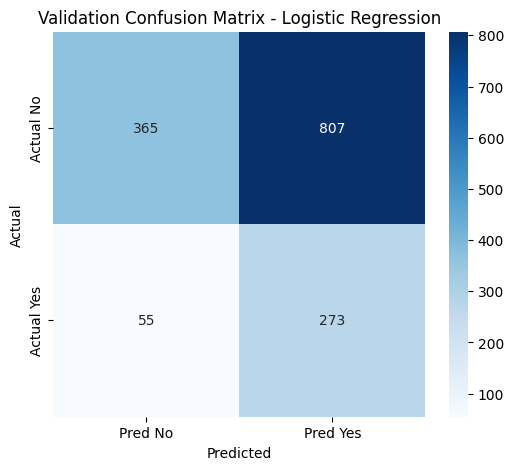


 Evaluating Best Model (Logistic Regression) on Test Data

 Logistic Regression - Test Metrics
Accuracy: 0.4160
Precision: 0.2605
Recall: 0.8614
F1-Score: 0.4000


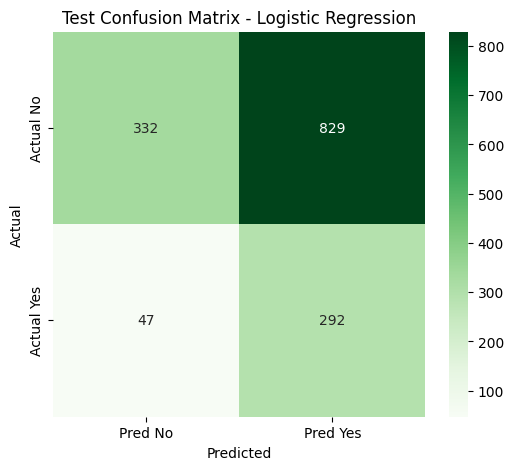

In [20]:
print("=== Step 5: Model Evaluation ===")

# Evaluate on validation set
with torch.no_grad():
    val_logits = logreg_model(X_val)
    val_probs = torch.sigmoid(val_logits)
    val_preds = (val_probs > 0.5).float()

    # Confusion matrix components
    true_pos = ((val_preds == 1) & (y_val == 1)).sum().item()
    true_neg = ((val_preds == 0) & (y_val == 0)).sum().item()
    false_pos = ((val_preds == 1) & (y_val == 0)).sum().item()
    false_neg = ((val_preds == 0) & (y_val == 1)).sum().item()


    acc_score = (true_pos + true_neg) / len(y_val)
    prec_score = true_pos / (true_pos + false_pos) if (true_pos + false_pos) > 0 else 0
    rec_score = true_pos / (true_pos + false_neg) if (true_pos + false_neg) > 0 else 0
    f1_val = 2 * (prec_score * rec_score) / (prec_score + rec_score) if (prec_score + rec_score) > 0 else 0

    print("\n Logistic Regression - Validation Metrics")
    print(f"Accuracy: {acc_score:.4f}")
    print(f"Precision: {prec_score:.4f}")
    print(f"Recall: {rec_score:.4f}")
    print(f"F1-Score: {f1_val:.4f}")

    # Confusion Matrix plot
    cm_val = np.array([[true_neg, false_pos], [false_neg, true_pos]])
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Pred No', 'Pred Yes'],
                yticklabels=['Actual No', 'Actual Yes'])
    plt.title('Validation Confusion Matrix - Logistic Regression')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

#  Testing on test dataset
print("\n Evaluating Best Model (Logistic Regression) on Test Data")
with torch.no_grad():
    test_logits = logreg_model(X_test)
    test_probs = torch.sigmoid(test_logits)
    test_preds = (test_probs > 0.5).float()

    tp_t = ((test_preds == 1) & (y_test == 1)).sum().item()
    tn_t = ((test_preds == 0) & (y_test == 0)).sum().item()
    fp_t = ((test_preds == 1) & (y_test == 0)).sum().item()
    fn_t = ((test_preds == 0) & (y_test == 1)).sum().item()

    acc_t = (tp_t + tn_t) / len(y_test)
    prec_t = tp_t / (tp_t + fp_t) if (tp_t + fp_t) > 0 else 0
    rec_t = tp_t / (tp_t + fn_t) if (tp_t + fn_t) > 0 else 0
    f1_t = 2 * (prec_t * rec_t) / (prec_t + rec_t) if (prec_t + rec_t) > 0 else 0

    print("\n Logistic Regression - Test Metrics")
    print(f"Accuracy: {acc_t:.4f}")
    print(f"Precision: {prec_t:.4f}")
    print(f"Recall: {rec_t:.4f}")
    print(f"F1-Score: {f1_t:.4f}")

    cm_test = np.array([[tn_t, fp_t], [fn_t, tp_t]])
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens',
                xticklabels=['Pred No', 'Pred Yes'],
                yticklabels=['Actual No', 'Actual Yes'])
    plt.title('Test Confusion Matrix - Logistic Regression')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()